# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Loading csv dataset

In [2]:
data=pd.read_csv("F:/ICT/python_programming/dataset_3/StudentsPerformance.csv")

Checking how our dataset lookslike.

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.shape

(1000, 8)

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Insight: From the above details we can understand that our dataset contains 1000 rows and 8 columns. And there is no null values in the dataset.our dataset contains both object and integer data types.

# 1. Find out how many males and females participated in the test.

In [7]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

From the above code we can identify that our dataset contains 518 female students and 482 male students

# 2. What do you think about the students' parental level of education?

In [8]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

From the above details we can understand the parents level of education. 59 parents are having Masters degree from all other parents these 59 parents have highest educational qualification.

Next we have to get the details of how many students finished their test preperation course.

In [21]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

From the above details we can conclude that only 358 students are finished their course and 642 students didnt finished their course.

Next we are going to calculate the total and average marks of the three subjects. and we created seperate columns for those 2 values.

In [9]:
data['total'] = data['math score'] + data['reading score'] + data['writing score']

In [10]:
data['average'] = data['total'] / 3

# 3. Who scores the most on average for math, reading and writing based on
          ● Test preparation course
           ● Gender

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test preparation course', ylabel='average'>

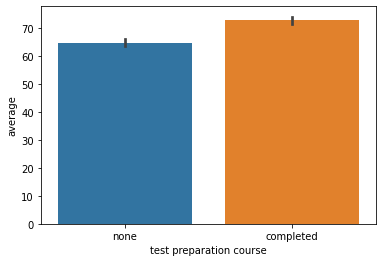

In [11]:
sns.barplot(data['test preparation course'], data['average'])

The above graph shows that students who completed the course obtained more average compared to the others.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='average'>

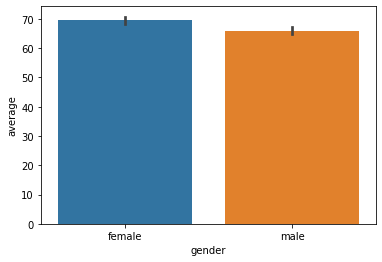

In [12]:
sns.barplot(data['gender'], data['average'])

The above graph shows that female students scored better average compared to male students.

# 4. What do you think about the scoring variation for math, reading and writing based on
     ● Gender
     ● Test preparation course

In [27]:
data2=data.groupby(['gender']).var()
data2

,math score,reading score,writing score,total,average
gender,,,,,
female,256.958593,207.677438,220.369327,1945.762608,216.195845
male,211.889097,200.211010,202.413924,1730.938035,192.326448


In [18]:
q4a=data.groupby('gender')[['average']].var()
q4a

,average
gender,
female,216.195845
male,192.326448


In [26]:
q4c=data.groupby(['test preparation course']).var()
q4c

,math score,reading score,writing score,total,average
test preparation course,,,,,
completed,210.884027,183.265864,175.202612,1507.745834,167.527315
none,246.668662,213.419851,226.251739,1863.127923,207.014214


In [16]:
q4=data.groupby('gender')[['average']].std()
q4

,average
gender,
female,14.703600
male,13.868181
